## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [1]:
from keras.datasets import cifar10
from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet 函數
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# 讀取資料集並作前處理
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.
x_test = x_test / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
# 建立 ResNet 模型
model = resnet(input_shape=(32,32,3)) 
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [4]:
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練整個資料集共 30個循環

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5984s 120ms/step - loss: 1.8460 - accuracy: 0.5065 - val_loss: 1.6235 - val_accuracy: 0.5582
Epoch 2/10
50000/50000 [==============================] - 3479s 70ms/step - loss: 1.3479 - accuracy: 0.6496 - val_loss: 1.6290 - val_accuracy: 0.5378
Epoch 3/10
50000/50000 [==============================] - 3129s 63ms/step - loss: 1.1317 - accuracy: 0.7148 - val_loss: 1.2289 - val_accuracy: 0.6841
Epoch 4/10
50000/50000 [==============================] - 2948s 59ms/step - loss: 0.9998 - accuracy: 0.7560 - val_loss: 1.7067 - val_accuracy: 0.5690
Epoch 5/10
50000/50000 [==============================] - 2933s 59ms/step - loss: 0.9027 - accuracy: 0.7890 - val_loss: 1.2232 - val_accuracy: 0.7014
Epoch 6/10
50000/50000 [==============================] - 36115s 722ms/step - loss: 0.8324 - accuracy: 0.8142 - val_loss: 1.3507 - val_accuracy: 0.6541
Epoch 7/10
50000/50000 [=======================

In [7]:
import matplotlib.pyplot as plt
def show_train_history(history,train,validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

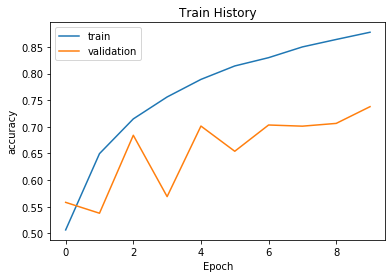

In [8]:
show_train_history(history,'accuracy','val_accuracy')

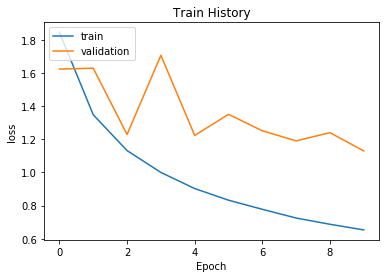

In [9]:
show_train_history(history,'loss','val_loss')